In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [54]:
df.shape

(301355, 5)

Проверяем формат столбцов

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [56]:
df['Дата'] = pd.to_datetime(df['Дата'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB
None


Сгруппируйте данные по дате, посчитайте количество продаж

In [57]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество_продаж')

Вывести несколько первых строк сгруппированных данных

In [58]:
grouped_df.head()

,Дата,Количество_продаж
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719


Нарисуйте график продаж у `grouped_df`

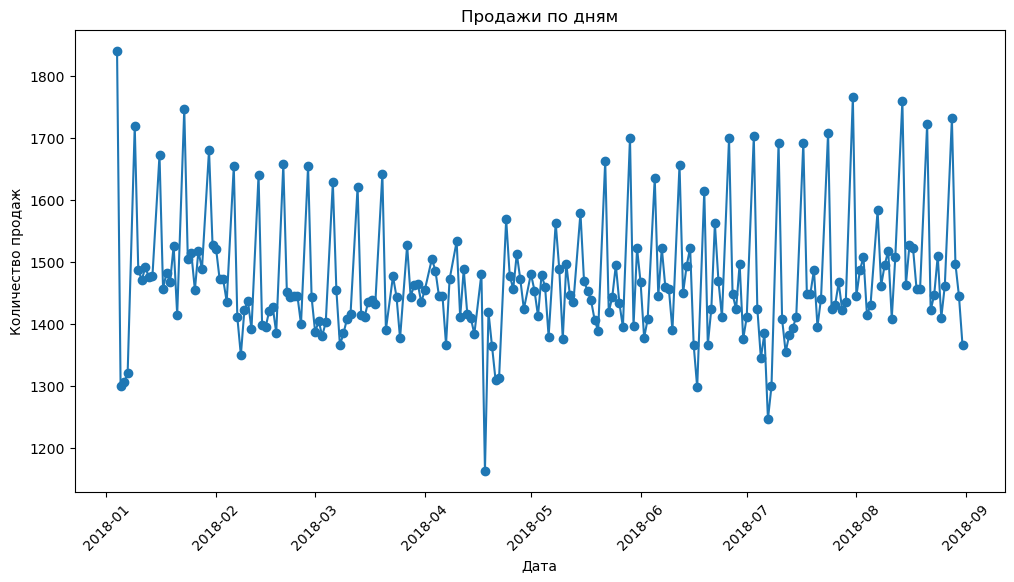

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество_продаж'], marker='o', linestyle='-')
plt.title('Продажи по дням')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Так как у нас имеется данные по дням, то можно заметить динамичные продажи, которые сильно варьируются каждый день. Но тем не менее, количество продаж в основном в районе 1400-1500. В основном, количество продажи превышает данный диапазон, чем опускается. В месяц может быть несколько пиков количество продаж. 

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [60]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = Q3 + 1.5 * IQR

outliers = df[df['Количество'] > outlier_threshold]
max_outlier_row = outliers.loc[outliers['Количество'].idxmax()]

print("Строка с максимальным выбросом:")
print(max_outlier_row)

Строка с максимальным выбросом:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [61]:
# Convert 'Дата' column to datetime
df['Дата'] = pd.to_datetime(df['Дата'])

In [62]:
df.head()

,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-01-04,1,address_0,product_0,4
1,2018-01-04,1,address_0,product_1,4
2,2018-01-04,1,address_0,product_2,5
3,2018-01-04,1,address_0,product_3,10
4,2018-01-04,1,address_0,product_4,2


In [63]:
from datetime import datetime, timedelta

In [64]:
# Define the start and end dates
start_date = datetime(2018, 6, 1)
end_date = datetime(2018, 8, 31)

# Iterate over the dates and filter out Fridays
fridays_2018_summer = []
current_date = start_date
while current_date <= end_date:
    if current_date.weekday() == 4:  # 4 corresponds to Friday
        fridays_2018_summer.append(current_date)
    current_date += timedelta(days=1)

# Print the list of Fridays
for friday in fridays_2018_summer:
    print(friday)

2018-06-01 00:00:00
2018-06-08 00:00:00
2018-06-15 00:00:00
2018-06-22 00:00:00
2018-06-29 00:00:00
2018-07-06 00:00:00
2018-07-13 00:00:00
2018-07-20 00:00:00
2018-07-27 00:00:00
2018-08-03 00:00:00
2018-08-10 00:00:00
2018-08-17 00:00:00
2018-08-24 00:00:00
2018-08-31 00:00:00


In [65]:
fridays_df = pd.DataFrame({'Date': fridays_2018_summer})

In [66]:
fridays_df.head()

,Date
0,2018-06-01
1,2018-06-08
2,2018-06-15
3,2018-06-22
4,2018-06-29


In [67]:
fridays_df.shape

(14, 1)

In [68]:
fridays_df = fridays_df.rename(columns={'Date':'Дата'})

In [69]:
fridays_df.head()

,Дата
0,2018-06-01
1,2018-06-08
2,2018-06-15
3,2018-06-22
4,2018-06-29


In [70]:
merged_df = pd.merge(df, fridays_df, on='Дата')

In [71]:
merged_df.head()

,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-06-01,1,address_0,product_0,10
1,2018-06-01,1,address_0,product_1,17
2,2018-06-01,1,address_0,product_2,17
3,2018-06-01,1,address_0,product_3,2
4,2018-06-01,1,address_0,product_4,3


In [72]:
merged_df.shape

(20654, 5)

In [73]:
merged_df1 = merged_df[merged_df['Склад'] == 3]

In [74]:
merged_df1.head()

,Дата,Склад,Контрагент,Номенклатура,Количество
633,2018-06-01,3,address_186,product_0,4
634,2018-06-01,3,address_186,product_1,6
635,2018-06-01,3,address_186,product_2,6
636,2018-06-01,3,address_186,product_3,2
637,2018-06-01,3,address_186,product_4,2


In [75]:
merged_df1.shape

(4767, 5)

In [76]:
max_index = merged_df1['Количество'].idxmax()

In [77]:
print(df.loc[max_index])

Дата            2018-01-16 00:00:00
Склад                             2
Контрагент               address_54
Номенклатура              product_3
Количество                        3
Name: 15389, dtype: object



Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [82]:
import chardet

In [83]:
with open('weather.xls', 'rb') as f:
    result = chardet.detect(f.read())

In [84]:
weather = pd.read_excel('weather.xls')

In [85]:
weather.head(30)

,"# Метеостанция Астана, Казахстан, WMO_ID=35188, выборка с 04.01.2018 по 31.08.2018, все дни",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,# Кодировка: UTF-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"# Информация предоставлена сайтом ""Расписание ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"# Пожалуйста, при использовании данных, любезн...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# Обозначения метеопараметров см. по адресу ht...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
6,31.08.2018 23:00,8.2,736.6,768.3,0.2,78,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12,NaN,NaN,NaN,NaN
7,31.08.2018 20:00,9.6,736.4,767.9,1.2,88,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12,NaN,NaN,NaN,NaN
8,31.08.2018 17:00,11.3,735.2,766.4,0.4,83,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10,8.5,NaN,NaN,NaN,NaN,NaN,NaN
9,31.08.2018 14:00,12.3,734.8,765.9,0.9,80,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4,8.9,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
weather = weather.drop([1, 2, 3, 4])


In [87]:
weather.head(25)

,"# Метеостанция Астана, Казахстан, WMO_ID=35188, выборка с 04.01.2018 по 31.08.2018, все дни",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,# Кодировка: UTF-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
6,31.08.2018 23:00,8.2,736.6,768.3,0.2,78,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12,NaN,NaN,NaN,NaN
7,31.08.2018 20:00,9.6,736.4,767.9,1.2,88,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12,NaN,NaN,NaN,NaN
8,31.08.2018 17:00,11.3,735.2,766.4,0.4,83,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10,8.5,NaN,NaN,NaN,NaN,NaN,NaN
9,31.08.2018 14:00,12.3,734.8,765.9,0.9,80,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4,8.9,NaN,NaN,NaN,NaN,NaN,NaN
10,31.08.2018 11:00,13.2,733.9,764.8,1,83,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,10,10.3,3,12,NaN,NaN,NaN,NaN
11,31.08.2018 08:00,12.5,732.9,763.9,0.1,99,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,...,NaN,NaN,4,12.3,3,12,Поверхность почвы сырая (вода застаивается на ...,8,NaN,NaN
12,31.08.2018 05:00,10.3,732.8,764.1,-0.8,85,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,"Высококучевые, просвечивающие или плотные в дв...",Перистые когтевидные или нитевидные или первые...,NaN,7.8,NaN,NaN,NaN,NaN,NaN,NaN
13,31.08.2018 02:00,10.8,733.6,764.8,-0.9,85,"Штиль, безветрие",0,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...",Перистые когтевидные или нитевидные или первые...,NaN,8.4,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
weather = pd.read_excel('weather.xls', header=5, skiprows=[5])

In [89]:
weather.head(25)

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.08.2018 23:00,8.2,736.6,768.3,0.2,78.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,31.08.2018 20:00,9.6,736.4,767.9,1.2,88.0,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,31.08.2018 17:00,11.3,735.2,766.4,0.4,83.0,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
3,31.08.2018 14:00,12.3,734.8,765.9,0.9,80.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN
4,31.08.2018 11:00,13.2,733.9,764.8,1.0,83.0,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,10.3,3,12.0,NaN,NaN,NaN,NaN
5,31.08.2018 08:00,12.5,732.9,763.9,0.1,99.0,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,...,NaN,NaN,4.0,12.3,3,12.0,Поверхность почвы сырая (вода застаивается на ...,8.0,NaN,NaN
6,31.08.2018 05:00,10.3,732.8,764.1,-0.8,85.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,"Высококучевые, просвечивающие или плотные в дв...",Перистые когтевидные или нитевидные или первые...,NaN,7.8,NaN,NaN,NaN,NaN,NaN,NaN
7,31.08.2018 02:00,10.8,733.6,764.8,-0.9,85.0,"Штиль, безветрие",0,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...",Перистые когтевидные или нитевидные или первые...,NaN,8.4,NaN,NaN,NaN,NaN,NaN,NaN
8,30.08.2018 23:00,11.1,734.5,765.7,-0.3,82.0,"Ветер, дующий с юго-юго-запада",1,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN
9,30.08.2018 20:00,17.1,734.8,765.3,0.3,63.0,"Ветер, дующий с северо-запада",1,NaN,NaN,...,Клочья (часто чечевицеобразные) высококучевых ...,"Перистых, перисто-кучевых или перисто-слоистых...",NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
weather['T']

0        8.2
1        9.6
2       11.3
3       12.3
4       13.2
        ... 
1913    -9.6
1914   -12.3
1915   -12.6
1916   -12.3
1917   -13.4
Name: T, Length: 1918, dtype: float64

In [91]:
weather['Местное время в Астане']

0       31.08.2018 23:00
1       31.08.2018 20:00
2       31.08.2018 17:00
3       31.08.2018 14:00
4       31.08.2018 11:00
              ...       
1913    04.01.2018 14:00
1914    04.01.2018 11:00
1915    04.01.2018 08:00
1916    04.01.2018 05:00
1917    04.01.2018 02:00
Name: Местное время в Астане, Length: 1918, dtype: object

In [92]:
weather['Местное время в Астане'] = pd.to_datetime(weather['Местное время в Астане'], format='%d.%m.%Y %H:%M')

print(weather['Местное время в Астане'].head())

0   2018-08-31 23:00:00
1   2018-08-31 20:00:00
2   2018-08-31 17:00:00
3   2018-08-31 14:00:00
4   2018-08-31 11:00:00
Name: Местное время в Астане, dtype: datetime64[ns]


In [93]:
daily_weather = weather.groupby(weather['Местное время в Астане'].dt.date)['T'].mean().reset_index()

In [94]:
daily_weather.head()

,Местное время в Астане,T
0,2018-01-04,-14.0750
1,2018-01-05,-16.8625
2,2018-01-06,-13.3000
3,2018-01-07,-12.7500
4,2018-01-08,-15.4125


In [95]:
daily_weather.shape

(240, 2)

In [96]:
daily_weather['Местное время в Астане'] = pd.to_datetime(daily_weather['Местное время в Астане'], format='%d.%m.%Y %H:%M')
merged_df = grouped_df.merge(daily_weather, left_on='Дата', right_on='Местное время в Астане', how='inner')

In [97]:
grouped_df.head()

,Дата,Количество_продаж
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719


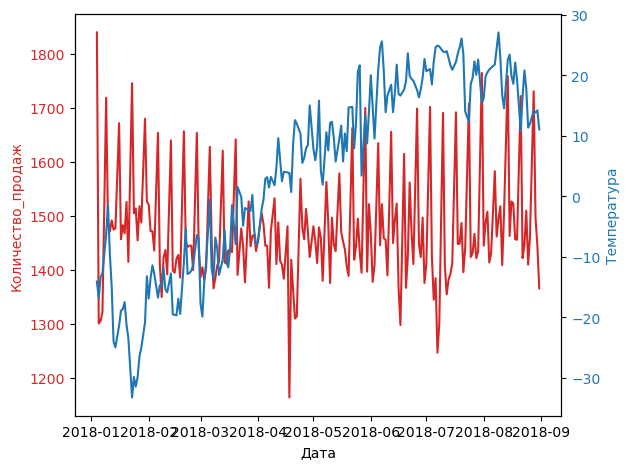

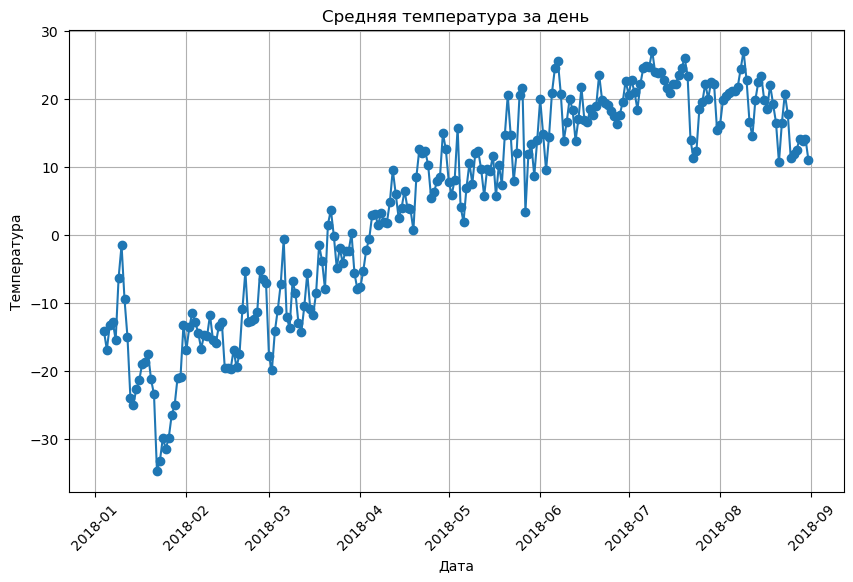

In [98]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество_продаж', color=color)
ax1.plot(merged_df['Дата'], merged_df['Количество_продаж'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # create second y-axis
color = 'tab:blue'
ax2.set_ylabel('Температура', color=color)
ax2.plot(merged_df['Дата'], merged_df['T'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# Plot the temperature graph
plt.figure(figsize=(10, 6))
plt.plot(daily_weather['Местное время в Астане'], daily_weather['T'], marker='o')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.title('Средняя температура за день')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()